In [1]:
import lvmnebular
import numpy as np

Loading simulation: /home/amrita/LVM/Bubble_v2_1e-14



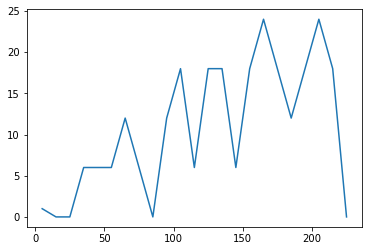

In [2]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_1e-14',900)

u.bin(rbinmax=240, drbin=10)

In [4]:
u.fitlines(sys_vel=20, lines0= np.array([6563, 6583,5007, 4959]))

Fitting Emmission Lines: ['6563' '6583' '5007' '4959']
Fitting Line: 6563.437836231357


IndexError: boolean index did not match indexed array along dimension 0; dimension is 169 but corresponding boolean dimension is 12301